In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
from keras.layers import SimpleRNN

In [4]:
import pandas as pd
import numpy as np
import itertools
from keras.preprocessing import text, sequence
from keras import utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
import pandas as pd
import numpy as np
df=pd.read_json("Team12_Chevron.json")

In [9]:
df.head(5)

,text,sentiment
1,Good morning. My name is Jonathan and I will b...,neutral
10,"Thanks Mike. Turning to Slide 5, an overview o...",neutral
100,"And so, there are times when we can fall in lo...",negative
101,Our next question comes from the line of Sam M...,neutral
102,"Mike, I'm going to try to not ask you to say t...",neutral


In [10]:
df['sentiment'].value_counts()

neutral     54
positive    45
negative    29
Name: sentiment, dtype: int64

In [11]:
train_size = int(len(df) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 102
Test size: 26


In [12]:
train_posts = df['text'][:train_size]
train_tags = df['sentiment'][:train_size]

test_posts = df['text'][train_size:]
test_tags = df['sentiment'][train_size:]

In [13]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [14]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [15]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [16]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [17]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (102, 1000)
x_test shape: (26, 1000)
y_train shape: (102, 3)
y_test shape: (26, 3)


In [18]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 32
epochs = 2

In [19]:
#from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# print('Loading data...')
# (input_train, y_train), (input_test, y_test) = df.load_data(num_words=max_features)
# print(len(input_train), 'train sequences')
# print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(x_train, maxlen=maxlen)
input_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

Pad sequences (samples x time)
input_train shape: (102, 1000)
input_test shape: (26, 1000)


In [21]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2)

Train on 81 samples, validate on 21 samples
Epoch 1/15
81/81 [==============================] - 1s 13ms/step - loss: 0.7313 - acc: 0.3745 - val_loss: 0.6439 - val_acc: 0.6667
Epoch 2/15
81/81 [==============================] - 0s 3ms/step - loss: 0.6557 - acc: 0.6749 - val_loss: 0.6271 - val_acc: 0.6667
Epoch 3/15
81/81 [==============================] - 0s 3ms/step - loss: 0.6395 - acc: 0.6667 - val_loss: 0.6097 - val_acc: 0.6667
Epoch 4/15
81/81 [==============================] - 0s 3ms/step - loss: 0.6322 - acc: 0.6667 - val_loss: 0.5997 - val_acc: 0.6667
Epoch 5/15
81/81 [==============================] - 0s 3ms/step - loss: 0.6298 - acc: 0.6667 - val_loss: 0.6037 - val_acc: 0.6667
Epoch 6/15
81/81 [==============================] - 0s 3ms/step - loss: 0.6278 - acc: 0.6667 - val_loss: 0.6095 - val_acc: 0.6667
Epoch 7/15
81/81 [==============================] - 0s 3ms/step - loss: 0.6286 - acc: 0.6667 - val_loss: 0.5994 - val_acc: 0.6667
Epoch 8/15
81/81 [===========================

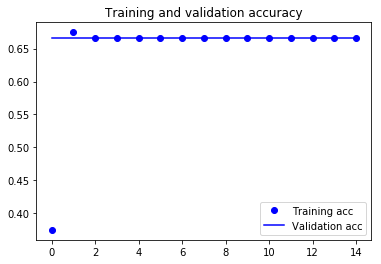

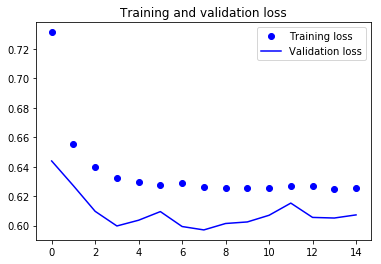

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 81 samples, validate on 21 samples
Epoch 1/10
81/81 [==============================] - 3s 35ms/step - loss: 0.6935 - acc: 0.4198 - val_loss: 0.6846 - val_acc: 0.6667
Epoch 2/10
81/81 [==============================] - 1s 10ms/step - loss: 0.6867 - acc: 0.6667 - val_loss: 0.6774 - val_acc: 0.6667
Epoch 3/10
81/81 [==============================] - 1s 11ms/step - loss: 0.6812 - acc: 0.6667 - val_loss: 0.6700 - val_acc: 0.6667
Epoch 4/10
81/81 [==============================] - 1s 10ms/step - loss: 0.6756 - acc: 0.6667 - val_loss: 0.6619 - val_acc: 0.6667
Epoch 5/10
81/81 [==============================] - 1s 10ms/step - loss: 0.6696 - acc: 0.6667 - val_loss: 0.6527 - val_acc: 0.6667
Epoch 6/10
81/81 [==============================] - 1s 11ms/step - loss: 0.6630 - acc: 0.6667 - val_loss: 0.6419 - val_acc: 0.6667
Epoch 7/10
81/81 [==============================] - 1s 11ms/step - loss: 0.6555 - acc: 0.6667 - val_loss: 0.6292 - val_acc: 0.6667
Epoch 8/10
81/81 [=====================

In [26]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

26/26 [==============================] - 0s 4ms/step
Test score: 0.6211764812469482
Test accuracy: 0.6666666865348816


In [27]:
text_labels = encoder.classes_ 

for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_posts.iloc[i][:50], "...")
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label + "\n")

You mentioned that you've done about 150,000 acres ...
Actual label:negative
Predicted label: neutral

Yes, so, we will share lot more detail in March be ...
Actual label:neutral
Predicted label: neutral

And so, with our 2.2 million net acres and 1.7 mil ...
Actual label:positive
Predicted label: neutral

Our currently disclosed resource, there is 1.2 bil ...
Actual label:positive
Predicted label: neutral

Earlier this week, we announced a $0.07 per share  ...
Actual label:positive
Predicted label: neutral

We are returns-driven and I mentioned that in my p ...
Actual label:neutral
Predicted label: neutral

And as you go through that kind of growth, you str ...
Actual label:positive
Predicted label: neutral

So, our Jay will talk a lot more about this in Mar ...
Actual label:neutral
Predicted label: neutral

Thanks Mike. And we know also that you have got an ...
Actual label:positive
Predicted label: neutral

Yes, so we were committed to capital discipline. W ...
Actual label:negative

In [28]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [29]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

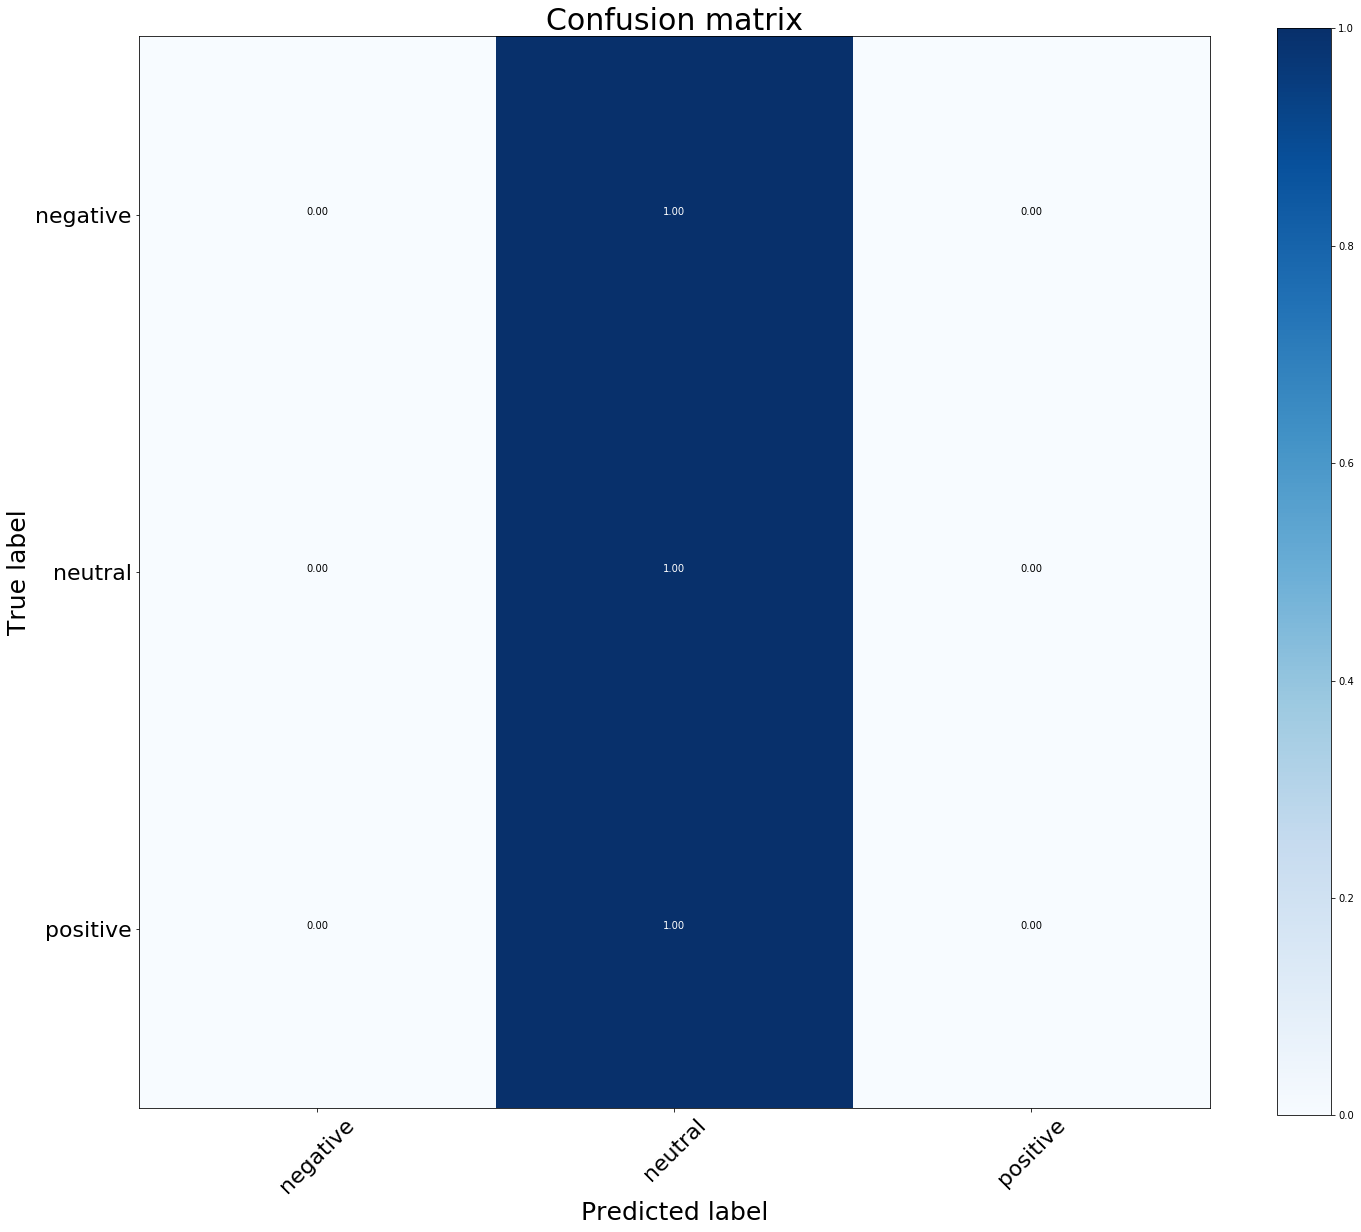

In [30]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()